In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import offline
from plotly.graph_objs import *



%matplotlib inline

df = pd.read_csv('CompleteDataset.csv', low_memory=False)
df['Wage'] = pd.to_numeric(df['Wage'].replace('K', '000', regex=True).replace('€', '', regex=True))
df['Value'] = pd.to_numeric(df['Value'].replace('M', '000000', regex=True).replace('€', '', regex=True).replace('K', '000', regex=True))
df['Crossing'] = pd.to_numeric(df['Crossing'].replace('\+', '', regex=True).replace('\-','.',regex=True))
#df['Ball control'].str.contains('+')

df['Ball control'] = pd.to_numeric(df['Ball control'].replace('\+', '', regex=True).replace('\-','.',regex=True))
df_salary = df.groupby('Age')
age = df['Age'].values
hist, bins = np.histogram(age, bins=range(0, max(age)))
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prepare datasets for reports. Format values from source csv file into integer values.

First chart shows players count per ages

Second chart show salary per ages

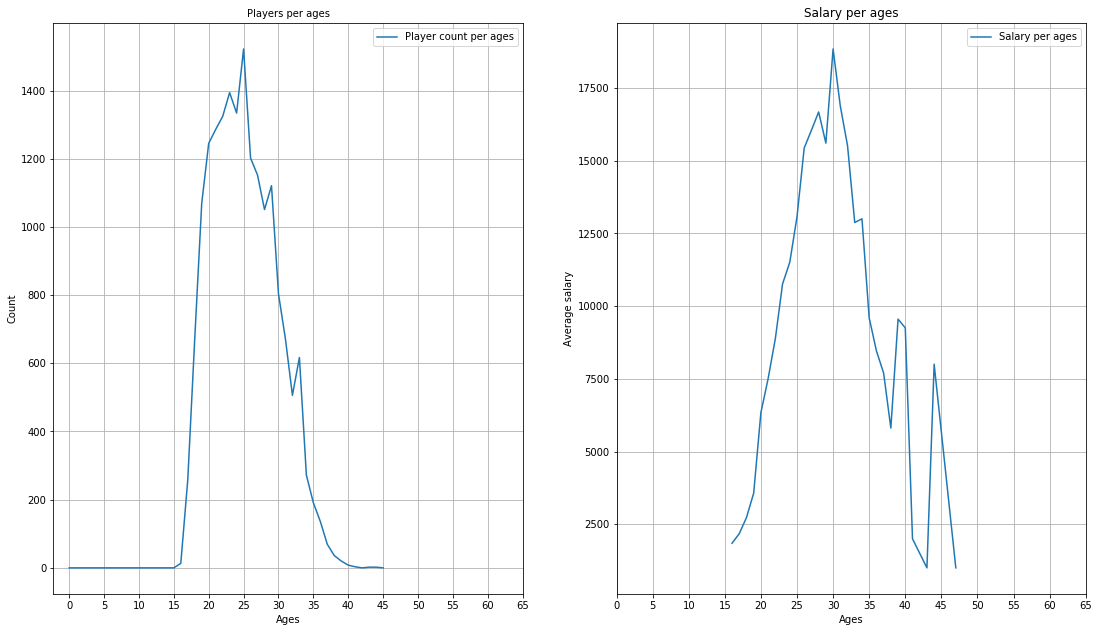

In [2]:


f = plt.figure('Correlation between salary and player count')
f.set_size_inches(18.5, 10.5)
ax = plt.subplot(1, 2, 1)

plt.plot(hist, label='Player count per ages')
ax.set_title("Players per ages", fontdict={'fontsize': 10})
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend()
plt.xticks(range(0, 70, 5))
plt.grid(True)
plt.show

ax2 = plt.subplot(1, 2, 2)
plt.plot(df_salary.agg({'Wage': 'mean'}), label='Salary per ages')
ax2.set_title('Salary per ages')
plt.xlabel('Ages')
plt.ylabel('Average salary')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 70, 5))

plt.show(f)

Plotly charts
Shows no any dependence betwee salary and Ball control or crossing. Data most be cleaned from emissions before analisys 



In [3]:
import plotly.graph_objs as go

trace = Scatter(x=df.Wage, y=df['Ball control'], name='Ball Control')
trace2 = Scatter(x=df.Wage, y=df['Crossing'], name='Crossing')
data = Data([trace,trace2])
layout = go.Layout(
    title='availability of players',
    xaxis=dict(title='Values'),
    yaxis=dict(title='Wage')
)
offline.init_notebook_mode(connected=True)
f = Figure({'data': data, 'layout': layout})
offline.iplot(f)


c:\users\иван\appdata\local\programs\python\python37-32\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Chart shows that we dont't see a strong dependence of Crossing and Ball control froma player wage. 

In [5]:
data4 = df.groupby('Wage')['Overall'].mean().reset_index(name='OverallAvg')
trace = Scatter(x=data4.Wage, y=data4.OverallAvg, name='Ball Control')
data = Data([trace])
layout = go.Layout(
    title='Wage and average overall',
    xaxis=dict(title='Overall'),
    yaxis=dict(title='Wage')
)
offline.init_notebook_mode(connected=True)
f = Figure({'data': data, 'layout': layout})
offline.iplot(f)


Chart shows strong dependence of overall from a playe wage